<a href="https://colab.research.google.com/github/drakesvoboda/EECS-504-PWC-Net/blob/master/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


## Mount Google Drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Downlowd Data


In [0]:
import os
os.chdir('/content/drive/Shared drives/EECS 504 PWC Net/Data')
if not os.path.exists('data_scene_flow.zip'):
    !wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow.zip
    !unzip -q data_scene_flow.zip -d data_scene_flow

In [0]:
os.chdir('/content/drive/Shared drives/EECS 504 PWC Net/Test Images')
if not os.path.exists('car1.jpg'):
    ! wget -O car1.jpg "https://drive.google.com/uc?export=download&id=14jfYyCRSeaCe2tdvNJd6lkG6C-DWzn2s"
    ! wget -O car2.jpg "https://drive.google.com/uc?export=download&id=1MNR0TSXPT1yxKaiOvBHforYHvd7Lr7jD"

## Git Clone

In [0]:
os.chdir('/content')
!git clone https://github.com/drakesvoboda/EECS-504-PWC-Net

Cloning into 'EECS-504-PWC-Net'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 298 (delta 35), reused 69 (delta 24), pack-reused 218
Receiving objects: 100% (298/298), 179.28 MiB | 30.21 MiB/s, done.
Resolving deltas: 100% (83/83), done.
Checking out files: 100% (218/218), done.


In [0]:
os.chdir('/content/EECS-504-PWC-Net')
!git pull
os.chdir('/content')

Already up to date.


In [0]:
import sys
sys.path.append('/content/EECS-504-PWC-Net')

## Libraries

In [0]:
pip install flow_vis

In [0]:
pip install pypng

     |████████████████████████████████| 655kB 3.3MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp36-none-any.whl size=67161 sha256=9a19512e236611e8be6164e9854fe113214d54bab2ae8b9236c889f36d0560c7
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng


In [0]:
import flow_vis
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# from scipy import signal
# import imageio

# Baseline Dense Flow Methods



In [0]:
from util import *
from baseline import *

In [0]:
import datetime

x = datetime.datetime.now()
date = x.strftime("%Y")+x.strftime("%m")+x.strftime("%d")
root_date = '/content/drive/Shared drives/EECS 504 PWC Net/Results/PWC-Net/'+date+'/'

# if os.path.exists(root_date):
#     time = x.strftime("%H")+x.strftime("%M")
#     root_date = root_date + date + time

root_image_2 = root_date+'/image_2/'
root_image_3 = root_date+'/image_3/'

os.makedirs(root_image_2, exist_ok=True)
os.makedirs(root_image_3, exist_ok=True)

## Dense GF

True

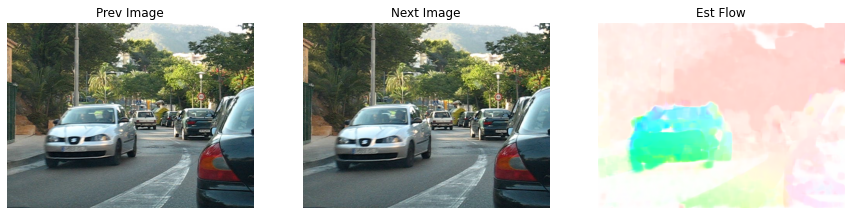

In [0]:
img_root = '/content/drive/Shared drives/EECS 504 PWC Net/Test Images'
save_root = '/content/drive/Shared drives/EECS 504 PWC Net/Results/Baseline_Results/Dense_GF/'
img1_name = 'car1.jpg'
img2_name = 'car2.jpg'
save_name = 'car.png'

os.chdir(img_root)
img1 = cv2.imread(img1_name)
img2 = cv2.imread(img2_name)

params = dict(pyr_scale = 0.5,
                levels = 5,
                winsize = 15, 
                iterations = 5, 
                poly_n = 7, 
                poly_sigma = 1.5,
                flags = 0)
    
flow = dense_GF(img1, img2, params, True)
flow_color = flow_vis.flow_to_color(flow[:,:,0:2])

plot_flow(img1, img2, flow_color)
write_png_flow(flow, save_root+save_name)
cv2.imwrite(save_root+'color_'+save_name, cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))

True

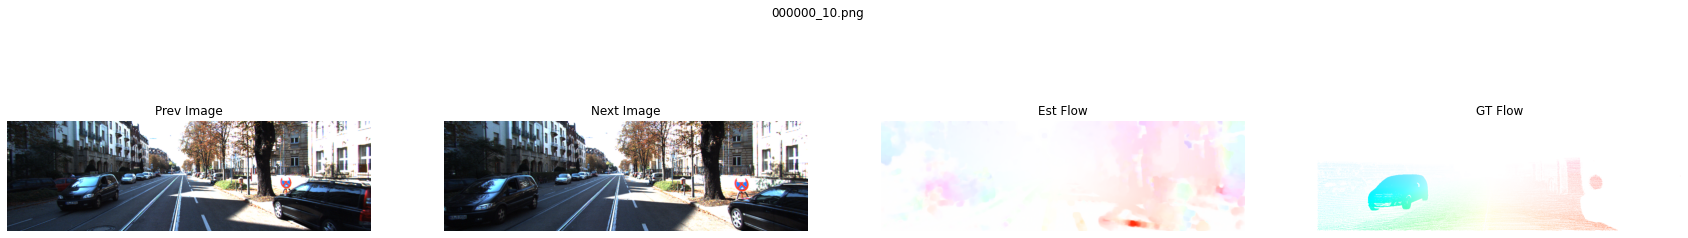

In [0]:
img_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/image_2/'
save_root = '/content/drive/Shared drives/EECS 504 PWC Net/Results/Baseline_Results/Dense_GF/image_2/'
GT_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/flow_occ/'

img1_name = '000000_10.png'
img2_name = '000000_11.png'
save_name = img1_name

os.chdir(img_root)

img1 = cv2.imread(img1_name)
img2 = cv2.imread(img2_name)

flow_target = read_png_flow(GT_root+img1_name)
flow_target_color = flow_vis.flow_to_color(flow_target[:,:,0:2], convert_to_bgr=False)

params = dict(pyr_scale = 0.5,
                levels = 5,
                winsize = 10, 
                iterations = 5, 
                poly_n = 7, 
                poly_sigma = 1.5,
                flags = 0)

flow = dense_GF(img1, img2, params)
flow_color = flow_vis.flow_to_color(flow[:,:,0:2])

plot_flow_w_GT(img1, img2, flow_color, flow_target_color, img1_name)
write_png_flow(flow, save_root+save_name);
cv2.imwrite(save_root+'color_'+save_name, cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))

True

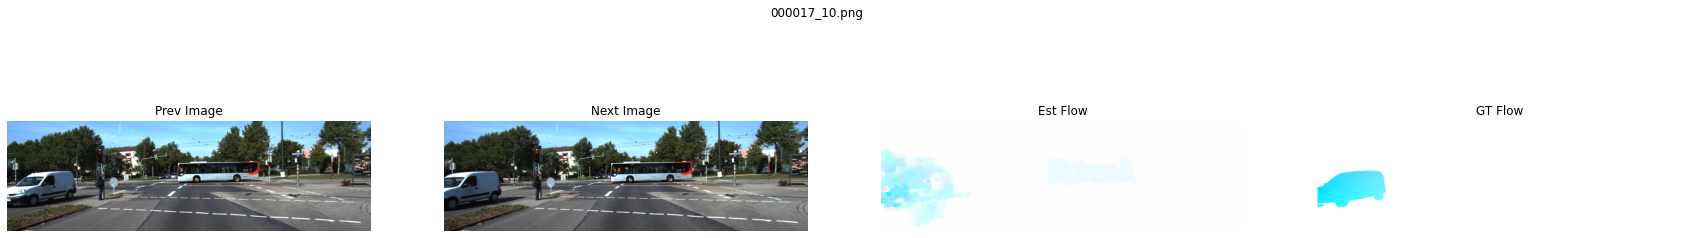

In [0]:
img_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/image_2/'
save_root = '/content/drive/Shared drives/EECS 504 PWC Net/Results/Baseline_Results/Dense_GF/image_2/'
GT_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/flow_occ/'

img1_name = '000017_10.png'
img2_name = '000017_11.png'
save_name = img1_name

os.chdir(img_root)

img1 = cv2.imread(img1_name)
img2 = cv2.imread(img2_name)

flow_target = read_png_flow(GT_root+img1_name)
flow_target_color = flow_vis.flow_to_color(flow_target[:,:,0:2], convert_to_bgr=False)

params = dict(pyr_scale = 0.5,
                levels = 5,
                winsize = 10, 
                iterations = 5, 
                poly_n = 7, 
                poly_sigma = 1.5,
                flags = 0)

flow = dense_GF(img1, img2, params, True)
flow_color = flow_vis.flow_to_color(flow[:,:,0:2])

plot_flow_w_GT(img1, img2, flow_color, flow_target_color, img1_name)
write_png_flow(flow, save_root+save_name);
cv2.imwrite(save_root+'color_'+save_name, cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))

In [0]:
from pathlib import Path

img_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/image_2/'
save_root = '/content/drive/Shared drives/EECS 504 PWC Net/Results/Baseline_Results/Dense_GF/image_2/'
GT_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/flow_occ/'

image_dir = Path(img_root)

im_1 = sorted([os.path.basename(x) for x in image_dir.glob('*_10.png')])
im_2 = sorted([os.path.basename(x) for x in image_dir.glob('*_11.png')])

os.chdir(img_root)

params = dict(pyr_scale = 0.5,
                levels = 5,
                winsize = 10, 
                iterations = 5, 
                poly_n = 7, 
                poly_sigma = 1.5,
                flags = 0)
    
for i in range(len(im_1)):
    img1_name = im_1[i]
    img2_name = im_2[i]
    save_name = img1_name

    img1 = cv2.imread(img1_name)
    img2 = cv2.imread(img2_name)

    flow_target = read_png_flow(GT_root+img1_name)
    flow_target_color = flow_vis.flow_to_color(flow_target[:,:,0:2], convert_to_bgr=False)

    # flow = dense_GF(img1, img2, params, True)
    flow = dense_GF(img1, img2, params, False)
    flow_color = flow_vis.flow_to_color(flow[:,:,0:2])

    plot_flow_w_GT(img1, img2, flow_color, flow_target_color, img1_name)
    write_png_flow(flow, save_root+save_name);
    cv2.imwrite(save_root+'color_'+save_name, cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))
    plt.show()

In [0]:
from pathlib import Path

img_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/image_3/'
save_root = '/content/drive/Shared drives/EECS 504 PWC Net/Results/Baseline_Results/Dense_GF/image_3/'
GT_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/flow_occ/'

image_dir = Path(img_root)

im_1 = sorted([os.path.basename(x) for x in image_dir.glob('*_10.png')])
im_2 = sorted([os.path.basename(x) for x in image_dir.glob('*_11.png')])

os.chdir(img_root)
params = dict(pyr_scale = 0.5,
                levels = 5,
                winsize = 10, 
                iterations = 5, 
                poly_n = 7, 
                poly_sigma = 1.5,
                flags = 0)
    
for i in range(len(im_1)):
    img1_name = im_1[i]
    img2_name = im_2[i]
    save_name = img1_name

    img1 = cv2.imread(img1_name)
    img2 = cv2.imread(img2_name)

    flow_target = read_png_flow(GT_root+img1_name)
    flow_target_color = flow_vis.flow_to_color(flow_target[:,:,0:2], convert_to_bgr=False)

    # flow = dense_GF(img1, img2, params, True)
    flow = dense_GF(img1, img2, params, False)
    flow_color = flow_vis.flow_to_color(flow[:,:,0:2])

    plot_flow_w_GT(img1, img2, flow_color, flow_target_color, img1_name)
    write_png_flow(flow, save_root+save_name);
    cv2.imwrite(save_root+'color_'+save_name, cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))
    plt.show()

## Dense LK

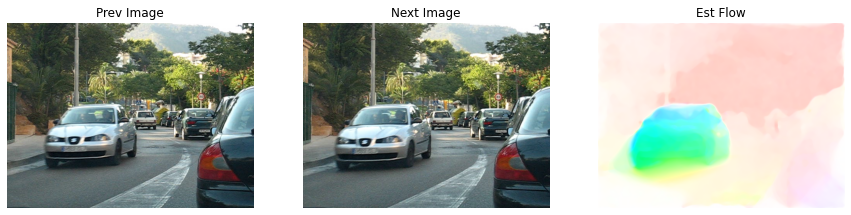

In [0]:
img_root = '/content/drive/Shared drives/EECS 504 PWC Net/Test Images'
save_root = '/content/drive/Shared drives/EECS 504 PWC Net/Results/Baseline_Results/Dense_LK/'
img1_name = 'car1.jpg'
img2_name = 'car2.jpg'
save_name = 'car.png'

os.chdir(img_root)
img1 = cv2.imread(img1_name)
img2 = cv2.imread(img2_name)

flow = dense_LK(img1, img2)
flow_color = flow_vis.flow_to_color(flow[:,:,0:2])

plot_flow(img1, img2, flow_color)
write_png_flow(flow, save_root+save_name);

In [0]:
from pathlib import Path

img_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/image_2/'
save_root = '/content/drive/Shared drives/EECS 504 PWC Net/Results/Baseline_Results/Dense_LK/image_2/'
GT_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/flow_occ/'

image_dir = Path(img_root)

im_1 = sorted([os.path.basename(x) for x in image_dir.glob('*_10.png')])
im_2 = sorted([os.path.basename(x) for x in image_dir.glob('*_11.png')])

os.chdir(img_root)
    
for i in range(len(im_1)):
    img1_name = im_1[i]
    img2_name = im_2[i]
    save_name = img1_name

    img1 = cv2.imread(img1_name)
    img2 = cv2.imread(img2_name)
    m, n, _ = img1.shape

    img1 = cv2.resize(img1, (1216, 352))
    img2 = cv2.resize(img2, (1216, 352))

    flow_target = read_png_flow(GT_root+img1_name)
    flow_target_color = flow_vis.flow_to_color(flow_target[:,:,0:2], convert_to_bgr=False)

    flow = dense_LK(img1, img2)

    img1 = cv2.resize(img1, (n, m))
    img2 = cv2.resize(img2, (n, m))
    flow = cv2.resize(flow, (n, m))

    flow_color = flow_vis.flow_to_color(flow[:,:,0:2])

    plot_flow_w_GT(img1, img2, flow_color, flow_target_color, img1_name)
    write_png_flow(flow, save_root+save_name);
    cv2.imwrite(save_root+'color_'+save_name, cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))
    plt.show()

In [0]:
from pathlib import Path

img_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/image_3/'
save_root = '/content/drive/Shared drives/EECS 504 PWC Net/Results/Baseline_Results/Dense_LK/image_3/'
GT_root = '/content/drive/Shared drives/EECS 504 PWC Net/Data/data_scene_flow/training/flow_occ/'

image_dir = Path(img_root)

im_1 = sorted([os.path.basename(x) for x in image_dir.glob('*_10.png')])
im_2 = sorted([os.path.basename(x) for x in image_dir.glob('*_11.png')])

os.chdir(img_root)
    
for i in range(len(im_1)):
    img1_name = im_1[i]
    img2_name = im_2[i]
    save_name = img1_name

    img1 = cv2.imread(img1_name)
    img2 = cv2.imread(img2_name)
    m, n, _ = img1.shape

    img1 = cv2.resize(img1, (1216, 352))
    img2 = cv2.resize(img2, (1216, 352))

    flow_target = read_png_flow(GT_root+img1_name)
    flow_target_color = flow_vis.flow_to_color(flow_target[:,:,0:2], convert_to_bgr=False)

    flow = dense_LK(img1, img2)

    img1 = cv2.resize(img1, (n, m))
    img2 = cv2.resize(img2, (n, m))
    flow = cv2.resize(flow, (n, m))

    flow_color = flow_vis.flow_to_color(flow[:,:,0:2])

    plot_flow_w_GT(img1, img2, flow_color, flow_target_color, img1_name)
    write_png_flow(flow, save_root+save_name);
    cv2.imwrite(save_root+'color_'+save_name, cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))
    plt.show()